In [ ]:
#!pip install anonympy

In [ ]:
#!pip install cape-privacy==0.3.0 --no-deps 

# Data Anonymization & Masking Guide

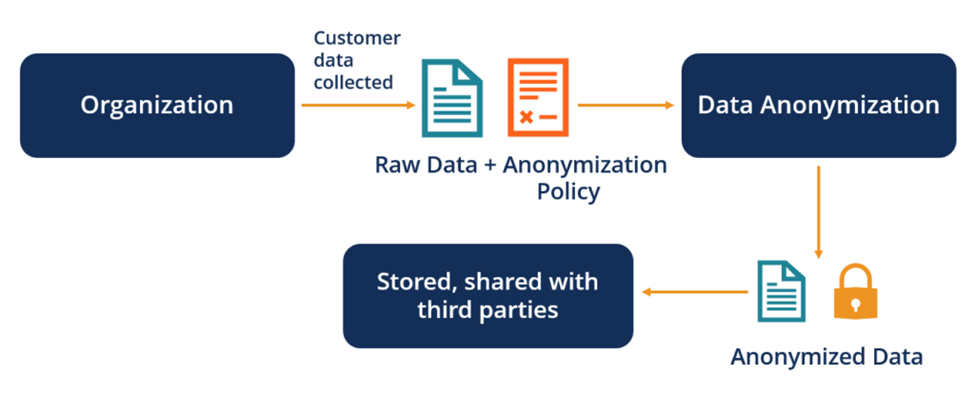

In [56]:
from IPython.display import Image
Image(filename='C:\\Users\\320166464\\Downloads\\Data_Anonymization.png')

# Type 1

## Data Anonymization & Masking all at once

### Read Source Data

In [1]:
import pandas as pd
path = 'C:\\Users\\320166464\\Downloads\\us-500\\us-500.csv'
df = pd.read_csv(path,parse_dates=['birthdate'])

### Anonymization Source Data

In [2]:
from anonympy.pandas import dfAnonymizer
from anonympy.pandas.utils_pandas import available_methods
anonym = dfAnonymizer(df)
ano_df = anonym.anonymize(inplace = False)

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


### Displaying Source Data

In [3]:
df.head()

,first_name,last_name,company_name,address,city,county,state,zip,phone1,phone2,email,web,birthdate
0,James,Butt,"Benton, John B Jr",6649 N Blue Gum St,New Orleans,Orleans,LA,70116,504-621-8927,504-845-1427,jbutt@gmail.com,http://www.bentonjohnbjr.com,1900-05-04
1,Josephine,Darakjy,"Chanay, Jeffrey A Esq",4 B Blue Ridge Blvd,Brighton,Livingston,MI,48116,810-292-9388,810-374-9840,josephine_darakjy@darakjy.org,http://www.chanayjeffreyaesq.com,1900-05-05
2,Art,Venere,"Chemel, James L Cpa",8 W Cerritos Ave #54,Bridgeport,Gloucester,NJ,8014,856-636-8749,856-264-4130,art@venere.org,http://www.chemeljameslcpa.com,1900-05-06
3,Lenna,Paprocki,Feltz Printing Service,639 Main St,Anchorage,Anchorage,AK,99501,907-385-4412,907-921-2010,lpaprocki@hotmail.com,http://www.feltzprintingservice.com,1900-05-07
4,Donette,Foller,Printing Dimensions,34 Center St,Hamilton,Butler,OH,45011,513-570-1893,513-549-4561,donette.foller@cox.net,http://www.printingdimensions.com,1900-05-08


### Displaying Anonymized Data

In [4]:
ano_df.head()

,first_name,last_name,address,city,state,email,company_name,county,zip,phone1,phone2,web,birthdate
0,April,Franklin,"90848 Jacqueline Land\nNew Jacobberg, IL 15811",New Williamborough,Michigan,brittany39@example.org,4e5da1fccb,86d8cfda20,70000,38b597060a,17d5a54a97,09e67f9a7e,1900-07-05
1,Taylor,Porter,"234 Mosley Cliff\nJenniferfurt, NY 99186",Ritterstad,Utah,susan47@example.org,8f9680a698,65e65abcd5,50000,701ca74e49,c2f4f333d9,8989a1353b,1899-11-05
2,Michael,Reynolds,"349 Kevin Grove\nNorth Stephaniestad, AK 95087",Amandaberg,California,bobbyclark@example.net,84333bc3ad,08943fd642,10000,99f2d4ee5e,c0d2e167a4,058d429b74,1900-01-06
3,Charlotte,Nelson,"025 Glenn Overpass\nNorth Laura, KY 45178",East Rebecca,Oklahoma,tuckermichelle@example.com,ae60b5459b,19011aa5e0,100000,04bddc4e2d,da46a3595d,204cca3fc7,1899-10-11
4,Angela,Good,"0925 Davis Burgs Suite 739\nHarrisshire, MA 90695",Port Angiemouth,Ohio,bsmith@example.com,bb4c72c4d2,3cb9c1a683,50000,d5624ac050,6065baf859,eba1c9a90c,1900-12-29


# Type 2

## Data Anonymization & Masking 1/1 as and when needed and as per requirements

### Read Source Data

In [42]:
import pandas as pd
path = 'C:\\Users\\320166464\\Downloads\\us-500\\us-500.csv'
df = pd.read_csv(path,parse_dates=['birthdate'])
df.head()

,first_name,last_name,company_name,address,city,county,state,zip,phone1,phone2,email,web,birthdate
0,James,Butt,"Benton, John B Jr",6649 N Blue Gum St,New Orleans,Orleans,LA,70116,504-621-8927,504-845-1427,jbutt@gmail.com,http://www.bentonjohnbjr.com,1900-05-04
1,Josephine,Darakjy,"Chanay, Jeffrey A Esq",4 B Blue Ridge Blvd,Brighton,Livingston,MI,48116,810-292-9388,810-374-9840,josephine_darakjy@darakjy.org,http://www.chanayjeffreyaesq.com,1900-05-05
2,Art,Venere,"Chemel, James L Cpa",8 W Cerritos Ave #54,Bridgeport,Gloucester,NJ,8014,856-636-8749,856-264-4130,art@venere.org,http://www.chemeljameslcpa.com,1900-05-06
3,Lenna,Paprocki,Feltz Printing Service,639 Main St,Anchorage,Anchorage,AK,99501,907-385-4412,907-921-2010,lpaprocki@hotmail.com,http://www.feltzprintingservice.com,1900-05-07
4,Donette,Foller,Printing Dimensions,34 Center St,Hamilton,Butler,OH,45011,513-570-1893,513-549-4561,donette.foller@cox.net,http://www.printingdimensions.com,1900-05-08


### Anonymization Source Data & finding column characteristics

In [43]:
from anonympy.pandas import dfAnonymizer
from anonympy.pandas.utils_pandas import available_methods
anonym = dfAnonymizer(df)
print('Numeric columns', anonym.numeric_columns)
print('Categorical columns', anonym.categorical_columns)
print('Date columns', anonym.datetime_columns)

Numeric columns ['zip']
Categorical columns ['first_name', 'last_name', 'company_name', 'address', 'city', 'county', 'state', 'phone1', 'phone2', 'email', 'web']
Date columns ['birthdate']


### Finding masking methods based on above column characteristics

In [44]:
available_methods()

`numeric`:
        * Perturbation - "numeric_noise"
        * Binning - "numeric_binning"
        * PCA Masking - "numeric_masking"
        * Rounding - "numeric_rounding"

`categorical`:
        * Synthetic Data - "categorical_fake"
        * Synthetic Data Auto - "categorical_fake_auto"
        * Resampling from same Distribution - "categorical_resampling"
        * Tokenazation - "categorical_tokenization"
        * Email Masking - "categorical_email_masking"

`datetime`:
        * Synthetic Date - "datetime_fake"
        * Perturbation - "datetime_noise"

`general`:
        * Drop Column - "column_suppression"
        


### Masking Data

In [45]:
anonym.datetime_fake('birthdate')  
anonym.numeric_noise('zip')
anonym.categorical_email_masking('email')

### Displaying column info. wrt masked and unmasked data

In [46]:
anonym.info()

+--------------+--------+-------------+----------------------+
|    Column    | Status |    Type     |        Method        |
+==============+========+=============+======================+
| first_name   | 0      | categorical |                      |
+--------------+--------+-------------+----------------------+
| last_name    | 0      | categorical |                      |
+--------------+--------+-------------+----------------------+
| company_name | 0      | categorical |                      |
+--------------+--------+-------------+----------------------+
| address      | 0      | categorical |                      |
+--------------+--------+-------------+----------------------+
| city         | 0      | categorical |                      |
+--------------+--------+-------------+----------------------+
| county       | 0      | categorical |                      |
+--------------+--------+-------------+----------------------+
| state        | 0      | categorical |                

### Displaying Anonymized Columns and Unanonymized Columns

In [47]:
anonym

+-------------------------------+
|  Total number of columns: 13  |
+===============================+
| Anonymized Column -> Method:  |
| - birthdate -> Synthetic Data |
| - zip -> Numeric Perturbation |
| - email -> Partial Masking    |
+-------------------------------+
| Unanonymized Columns:         |
| - first_name                  |
| - last_name                   |
| - company_name                |
| - address                     |
| - city                        |
| - county                      |
| - state                       |
| - phone1                      |
| - phone2                      |
| - web                         |
+-------------------------------+

### Generating list of methods available begining with 'f'

In [48]:
from anonympy.pandas.utils_pandas import fake_methods
fake_methods('f')

 factories, file_extension, file_name,file_path,firefox, first_name,first_name_female, first_name_male,first_name_nonbinary,fixed_width, format,free_email, free_email_domain, future_date, future_datetime


### Anonymizing columns

In [50]:
anonym.categorical_fake_auto()
anonym.categorical_fake({'web': 'url', 'phone1': 'phone_number', 'phone2': 'phone_number', 'county': 'city', 'company_name': 'company'})

`email` column already anonymized!


### Displaying Anonymized Columns and Unanonymized Columns

In [51]:
anonym

+----------------------------------+
|   Total number of columns: 13    |
+==================================+
| Anonymized Column -> Method:     |
| - birthdate -> Synthetic Data    |
| - zip -> Numeric Perturbation    |
| - email -> Partial Masking       |
| - first_name -> Synthetic Data   |
| - last_name -> Synthetic Data    |
| - address -> Synthetic Data      |
| - city -> Synthetic Data         |
| - state -> Synthetic Data        |
| - web -> Synthetic Data          |
| - phone1 -> Synthetic Data       |
| - phone2 -> Synthetic Data       |
| - county -> Synthetic Data       |
| - company_name -> Synthetic Data |
+----------------------------------+
| Unanonymized Columns:            |
|                                  |
+----------------------------------+

### Saving as a dataframe

In [54]:
x = anonym.to_df()

In [55]:
x.head()

,first_name,last_name,company_name,address,city,county,state,zip,phone1,phone2,email,web,birthdate
0,Rachel,Williams,Dennis Group,"37845 Amy Glen\nRamostown, NC 56085",Riosmouth,West Anthony,South Carolina,70121,517-840-6942x37636,419.523.5114x08161,j*****t@gmail.com,https://avery-campbell.biz/,1970-02-01
1,Mark,Delgado,Murray LLC,"7460 Ramirez Mountains Suite 274\nHarrisside, ...",Ronaldton,East Amandaview,Rhode Island,48118,659.849.6978x7579,(014)695-3076,j*****y@darakjy.org,http://hurst.net/,1995-10-06
2,Deanna,Scott,Bullock-Acosta,"530 Brandon Falls Suite 600\nNew Robert, RI 74793",Gregoryside,Stephensbury,Alaska,8015,001-375-625-0952,(332)191-8699,a*****t@venere.org,http://www.hudson.net/,1973-11-07
3,Bruce,Berg,Jackson-Clark,"3939 Shawn Fork\nNorth Tammyberg, GA 76154",Patrickborough,South Jessica,California,99508,(247)269-7757x5011,835.353.2654,l*****i@hotmail.com,https://brooks.org/,1971-01-10
4,Paul,Young,Scott LLC,"9307 Jones Locks\nSouth Scottbury, RI 86657",West Donaldburgh,Port Jenniferchester,New Hampshire,45004,751-863-5344x545,4736578309,d*****r@cox.net,https://nash.com/,1970-09-02


In [35]:
#fake_methods('c')

 cache_pattern, catch_phrase, century, chrome, city, city_prefix, city_suffix, color, color_name, company, company_email, company_suffix, coordinate, country, country_calling_code, country_code, credit_card_expire,credit_card_full, credit_card_number, credit_card_provider, credit_card_security_code, cryptocurrency, cryptocurrency_code, cryptocurrency_name, csv, currency, currency_code, currency_name, currency_symbol, current_country, current_country_code
